In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
seeds = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
capacities = [4, 5, 6]

df_deliveries = []
df_solutions = []
df_movements = []

for seed in seeds:
    df_partial = pd.read_csv("output/vrp_deliveries_seed%d.csv" % (seed,), sep = ";")
    df_partial["seed"] = seed
    df_deliveries.append(df_partial)

    for capacity in capacities:
        df_partial = pd.read_csv("output/vrp_solution_seed%d_cap%d.csv" % (seed, capacity), sep = ";")
        df_partial["seed"] = seed
        df_partial["capacity"] = capacity
        df_solutions.append(df_partial)

        df_partial = pd.read_csv("output/vrp_movements_seed%d_cap%d/output_legs.csv.gz" % (seed, capacity), sep = ";")
        df_partial["seed"] = seed
        df_partial["capacity"] = capacity
        df_movements.append(df_partial)

df_deliveries = pd.concat(df_deliveries)
df_solutions = pd.concat(df_solutions)
df_movements = pd.concat(df_movements)

In [5]:
seeds = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
services = ["dhl", "dpd", "poste", "tnt_fedex", "ups"]

df_deliveries_baseline = []
df_solutions_baseline = []
df_movements_baseline = []

for service in services:
    for seed in seeds:
        df_partial = pd.read_csv("output/deliveries_for_%s_seed%d.csv" % (service, seed), sep = ";")
        df_partial["seed"] = seed
        df_partial["service"] = service
        df_deliveries_baseline.append(df_partial)

        df_partial = pd.read_csv("output/vrp_solution_for_%s_seed%d.csv" % (service, seed), sep = ";")
        df_partial["seed"] = seed
        df_partial["service"] = service
        df_partial["vehicle_id"] += "_" + service
        df_solutions_baseline.append(df_partial)

        df_partial = pd.read_csv("output/vrp_movements_for_%s_seed%d/output_legs.csv.gz" % (service, seed), sep = ";")
        df_partial["seed"] = seed
        df_partial["service"] = service
        df_movements_baseline.append(df_partial)

df_deliveries_baseline = pd.concat(df_deliveries_baseline)
df_solutions_baseline = pd.concat(df_solutions_baseline)
df_movements_baseline = pd.concat(df_movements_baseline)

In [10]:
df_deliveries.groupby("seed")["household_id"].nunique().reset_index(name = "parcels")["parcels"].describe()

count     10.000000
mean     112.400000
std       10.595597
min      102.000000
25%      103.000000
50%      109.500000
75%      122.500000
max      129.000000
Name: parcels, dtype: float64

Capacity 4
count    10.000000
mean      4.800000
std       1.229273
min       3.000000
25%       4.250000
50%       5.000000
75%       5.000000
max       7.000000
Name: vehicles, dtype: float64
Capacity 5
count    10.000000
mean      4.600000
std       1.173788
min       3.000000
25%       4.000000
50%       4.500000
75%       5.750000
max       6.000000
Name: vehicles, dtype: float64
Capacity 6
count    10.000000
mean      3.900000
std       1.197219
min       3.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       6.000000
Name: vehicles, dtype: float64


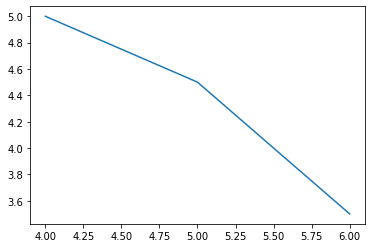

In [37]:
values = []

for capacity in capacities:
    print("Capacity", capacity)
    df_analysis = df_solutions[
        df_solutions["capacity"] == capacity
    ].groupby("seed")["vehicle_id"].nunique().reset_index(name = "vehicles")["vehicles"]
    print(df_analysis.describe())
    
    values.append(df_analysis.quantile(0.5))
    
plt.plot(capacities, values)

Capacity 4
count       10.000000
mean     66347.100000
std       5808.799885
min      59000.000000
25%      61820.500000
50%      65736.500000
75%      68809.500000
max      75877.000000
Name: distance, dtype: float64
Capacity 5
count       10.000000
mean     57794.200000
std       4728.111881
min      51920.000000
25%      54761.000000
50%      57594.000000
75%      58989.250000
max      66028.000000
Name: distance, dtype: float64
Capacity 6
count       10.000000
mean     53569.500000
std       4845.529492
min      47771.000000
25%      49413.500000
50%      52519.000000
75%      56667.250000
max      62509.000000
Name: distance, dtype: float64


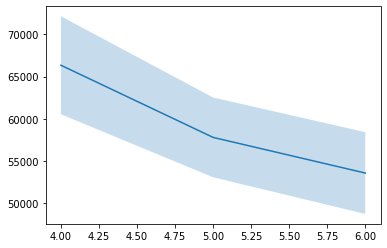

In [44]:
values = []
stds = []

for capacity in capacities:
    print("Capacity", capacity)
    df_analysis = df_movements[
        df_movements["capacity"] == capacity
    ].groupby("seed")["distance"].sum().reset_index(name = "distance")["distance"]
    print(df_analysis.describe())
    
    values.append(df_analysis.mean())
    stds.append(df_analysis.std())
    
values = np.array(values)
stds = np.array(stds)

plt.plot(capacities, values)
plt.fill_between(capacities, values - stds, values + stds, alpha = 0.25)

In [16]:
df_deliveries_baseline.groupby("seed")["household_id"].nunique().reset_index(name = "parcels")["parcels"].describe()

count     10.000000
mean     112.400000
std       10.595597
min      102.000000
25%      103.000000
50%      109.500000
75%      122.500000
max      129.000000
Name: parcels, dtype: float64

In [17]:
df_solutions_baseline.groupby("seed")["vehicle_id"].nunique().reset_index(name = "vehicles")["vehicles"].describe()

count    10.000000
mean      5.100000
std       0.316228
min       5.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       6.000000
Name: vehicles, dtype: float64

In [18]:
df_movements_baseline.groupby("seed")["distance"].sum().reset_index(name = "distance")["distance"].describe()

count       10.000000
mean     64455.800000
std       4649.685194
min      57724.000000
25%      61964.250000
50%      64576.500000
75%      67000.750000
max      71614.000000
Name: distance, dtype: float64

In [19]:
df_solutions

,vehicle_id,activity_index,arrival_time,end_time,name,location_id,seed,capacity
0,vehicle_1,-1,0.00000,0.00000,start,6068627214,1000,4
1,vehicle_1,205,60.00000,120.00000,pickupShipment,6068627214,1000,4
2,vehicle_1,35,120.00000,180.00000,pickupShipment,6068627214,1000,4
3,vehicle_1,125,180.00000,240.00000,pickupShipment,6068627214,1000,4
4,vehicle_1,206,844.27296,21900.00000,deliverShipment,16564346,1000,4
...,...,...,...,...,...,...,...,...
207,vehicle_18,163,67386.34888,67446.34888,pickupShipment,6068627214,10000,6
208,vehicle_18,88,67582.81552,67882.81552,deliverShipment,5947847668,10000,6
209,vehicle_18,164,67882.81552,68182.81552,deliverShipment,5947847668,10000,6
210,vehicle_18,54,68182.81552,68482.81552,deliverShipment,5947847668,10000,6


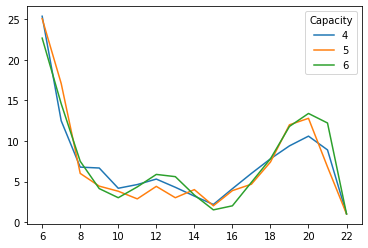

In [29]:
for capacity in capacities:
    df_time = df_solutions.copy()
    df_time = df_time[df_time["capacity"] == capacity]
    df_time = df_time[df_time["name"] == "deliverShipment"]

    q = 1

    df_time["end_bin"] = (df_time["end_time"] // (3600 / q)) * q

    df_count = df_time.groupby([
        "seed", "end_bin"
    ]).size().reset_index(name = "count").groupby("end_bin")["count"].aggregate([
        "mean", "std"
    ]).reset_index()

    #plt.fill_between(
    #    df_count["end_bin"], df_count["mean"] - df_count["std"], df_count["mean"] + df_count["std"], alpha = 0.25)
    plt.plot(df_count["end_bin"], df_count["mean"], label = capacity)

plt.legend(loc = "best", title = "Capacity")

,end_bin,mean,std
0,8.0,46.100000,3.071373
1,9.0,32.100000,4.121758
2,10.0,21.000000,4.594683
3,11.0,10.000000,3.674235
4,12.0,1.000000,NaN
5,13.0,4.555556,2.603417


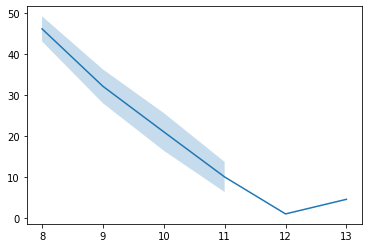

In [31]:
df_time = df_solutions_baseline.copy()
df_time = df_time[df_time["name"] == "deliverShipment"]

df_time["end_bin"] = df_time["end_time"] // 3600

df_count = df_time.groupby([
    "seed", "end_bin"
]).size().reset_index(name = "count").groupby("end_bin")["count"].aggregate([
    "mean", "std"
]).reset_index()

plt.fill_between(
    df_count["end_bin"], df_count["mean"] - df_count["std"], df_count["mean"] + df_count["std"], alpha = 0.25)
plt.plot(df_count["end_bin"], df_count["mean"])


df_count